In [3]:
import pandas as pd
from sklearn.preprocessing import normalize, StandardScaler

df = pd.read_csv('processed_creditcard.csv')

# Scale features from V1 to Amount (columns 1 to 29)
df.iloc[:, 1:30] = StandardScaler().fit_transform(df.iloc[:, 1:30])

data_matrix = df.values

X = data_matrix[:, 1:30]
y = data_matrix[:, 30].astype(int)  # Convert labels to int

print(X.shape)  # Should print {0, 1}

# Normalize features per sample
X = normalize(X, norm="l1")




(284807, 29)


DATA SET TESTING AND TRAINING DATA

In [4]:
from sklearn.model_selection import train_test_split

#split the data into features and target 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

BUILD A DECISON TREE WITH SKITLEARN

In [5]:
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.tree import DecisionTreeClassifier


#class inbalance (this code pays attention to rare classes)
#note if u dont wieght samples it will predict majority class
w_train = compute_sample_weight('balanced',y_train)

#Building the  decison tree model
dt = DecisionTreeClassifier(max_depth=4,random_state=35)
dt.fit(X_train,y_train,sample_weight=w_train)


DecisionTreeClassifier(max_depth=4, random_state=35)

EVALUATE THE DECISION TREE MODELS 

In [6]:
#time to predict
y_pred = dt.predict_proba(X_test)[:,1]

In [7]:
#check the accurancy of the model
from sklearn.metrics import roc_auc_score, roc_curve,auc

Check_score = roc_auc_score(y_test,y_pred)
print("AUC SCORE: {0: .3f}".format (Check_score))

AUC SCORE:  0.939


visualtion of the model predited

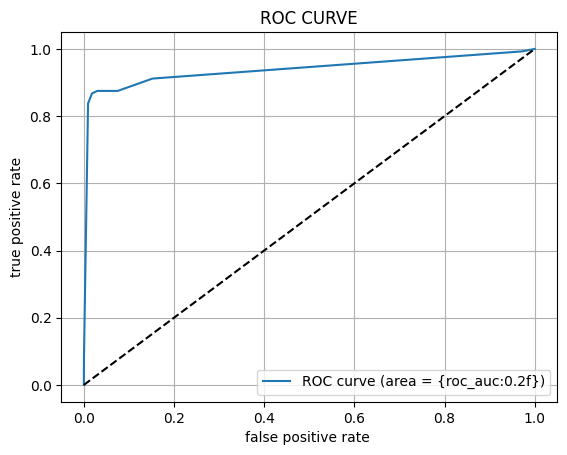

In [14]:
#plot the Roc curve


# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt

plt.plot(fpr,tpr,label="ROC curve (area = {roc_auc:0.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # random line
plt.xlabel('false positive rate ')
plt.ylabel("true positive rate")
plt.title('ROC CURVE')
plt.legend(loc='lower right')
plt.grid()
plt.show()


